In [17]:
#generate a hexagon
import math
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

def hexagon_generator(edge_length, offset):
    """Generator for coordinates in a hexagon."""
    x, y = offset
    for angle in range(0, 360, 60):
        x += math.cos(math.radians(angle)) * edge_length
        y += math.sin(math.radians(angle)) * edge_length
        yield x, y

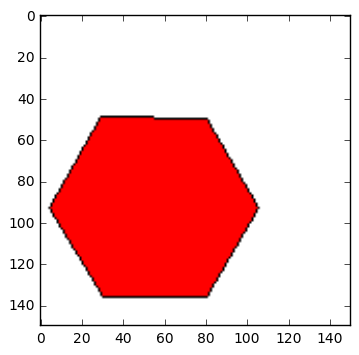

In [15]:
image = Image.new('RGB', (150, 150), 'white')
draw = ImageDraw.Draw(image)
hexagon = list(hexagon_generator(50, offset=(30, 50)))
draw.polygon(hexagon, outline='black', fill='red')
plt.imshow(image)

In [18]:
print np.asarray(hexagon)

[[  80.           50.        ]
 [ 105.           93.30127019]
 [  80.          136.60254038]
 [  30.          136.60254038]
 [   5.           93.30127019]
 [  30.           50.        ]]


In [21]:
nphex = np.asarray(hexagon)
print nphex.shape 

(6, 2)


In [93]:
def subdivide_lines(lines, subdivisions=50, close=False):
    '''given an np array of points that define lines, returns an array of points on the line
       with # subdivisions each. Close if you want a closed loop'''
    
    subdivided = []
    for i in xrange(0, lines.shape[0]):
        r = lines[i]
        line = []
        if i != lines.shape[0] - 1:
            v = lines[i+1] - lines[i]
        elif i == lines.shape[0] - 1 and close:
            v = lines[0] - lines[i]
        else:
            return np.asarray(subdivided)
        for j in xrange(1, subdivisions+1):
            line.append(np.asarray(r + (j*1.0/subdivisions)*v))
        subdivided.append(np.asarray(line))
            
    return np.asarray(subdivided)

In [94]:
subhex = subdivide_lines(nphex, close=True)
print subhex.shape

(6, 50, 2)


In [97]:
flathex = subhex.reshape(-1,2)
flathex = flathex.T
print flathex.shape

(2, 300)


In [108]:
def cartesian_to_cylindrical(x, y, z):
    '''Given 3 np arrays--x, y, z--of cartesian points, returns a np array of r, theta (in radians), z'''
    c_list = []
    for i in xrange(len(x)):
        # print (x[i], y[i])
        r = np.sqrt(float(x[i])**2 + float(y[i])**2)
        t = np.arctan2(float(y[i]), float(x[i]))
        c_list.append([r, t, float(z[i])])
    return np.asarray(c_list)


In [113]:
cylin_hex = cartesian_to_cylindrical(flathex[0,:], flathex[1,:], np.zeros(flathex.shape[1]))

In [114]:
print cylin_hex

[[  95.22395991    0.56352865    0.        ]
 [  96.11037967    0.56836717    0.        ]
 [  96.99900835    0.57311715    0.        ]
 [  97.88978579    0.57778078    0.        ]
 [  98.78265385    0.58236021    0.        ]
 [  99.67755636    0.5868575     0.        ]
 [ 100.57443901    0.59127467    0.        ]
 [ 101.4732493     0.59561367    0.        ]
 [ 102.37393645    0.5998764     0.        ]
 [ 103.27645135    0.6040647     0.        ]
 [ 104.18074651    0.60818036    0.        ]
 [ 105.08677597    0.61222513    0.        ]
 [ 105.99449526    0.61620068    0.        ]
 [ 106.90386132    0.62010866    0.        ]
 [ 107.81483249    0.62395065    0.        ]
 [ 108.72736843    0.62772821    0.        ]
 [ 109.64143006    0.63144283    0.        ]
 [ 110.55697955    0.63509598    0.        ]
 [ 111.47398022    0.63868908    0.        ]
 [ 112.39239657    0.6422235     0.        ]
 [ 113.31219417    0.64570058    0.        ]
 [ 114.23333965    0.64912163    0.        ]
 [ 115.155

/Users/noon/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


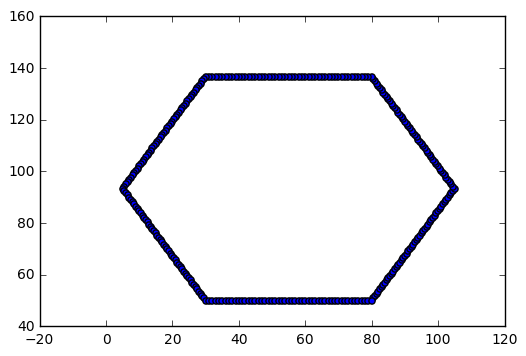

In [101]:
plt.scatter(flathex[0,:], flathex[1,:])
plt.show()

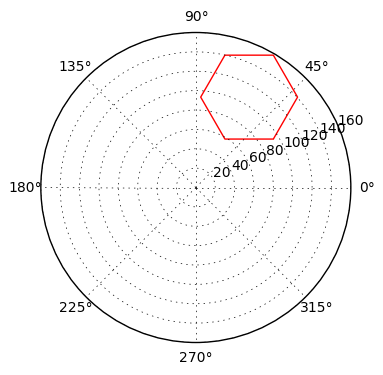

In [115]:
r = cylin_hex[:,0]
theta = cylin_hex[:,1]

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r, color='r', linewidth=1)
# ax.grid(True)

# ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()


In [116]:
#writing gcode (NOTE: CHECK MOTORS FOR Z <-> THETA CONVERSION TOMORROW)

def write_gcode(f, r, t, z):
    z_r = t * 6.4/360 #rot #TODO CHECK 6.4 also make this radians instead
    y = z #vert
    x = r #radial
    #note: we don't care about Y right now
    f.write("G0 X%f\n" % x)
    f.write("G0 Z%f\n" % z_r)
    f.write("M400\n") #waits to finish

In [117]:
with open ('test.gcode', 'wb+') as f:
    for point in cylin_hex:
        write_gcode(f, point[0], point[1], point[2])